In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import signal


In [2]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

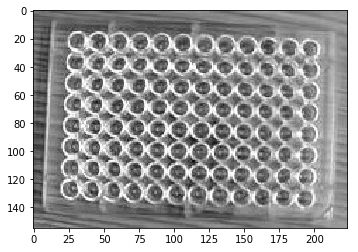

(155, 224)

In [7]:
#LOAD IN TEMPLATE IMAGE AND CONVERT TO GREYSCALE
template = mpimg.imread('//altair/shared/Automation/Projects/MultiDropMachineVision/TrainingImages/Template/PlateTemplate.jpg')     
grayTemplate = rgb2gray(template)    
grayTemplate = grayTemplate - grayTemplate.mean()
plt.imshow(grayTemplate, cmap = plt.get_cmap('gray'))
plt.show()


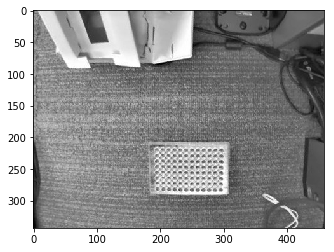

In [89]:
#LOAD IN TEST IMAGE AND CONVERT TO GREYSCALE
testImg = mpimg.imread('//altair/shared/Automation/Projects/MultiDropMachineVision/TrainingImages/Template/PlateImage_1.jpg')     
grayTestImg = rgb2gray(testImg)
grayTestImg = grayTestImg - grayTestImg.mean()
#grayTestImg = grayTestImg + np.random.randn(*grayTestImg.shape) * 50
plt.imshow(grayTestImg, cmap = plt.get_cmap('gray'))
plt.show()

In [90]:
corr = signal.correlate2d(grayTestImg, grayTemplate, boundary='symm', mode='same')

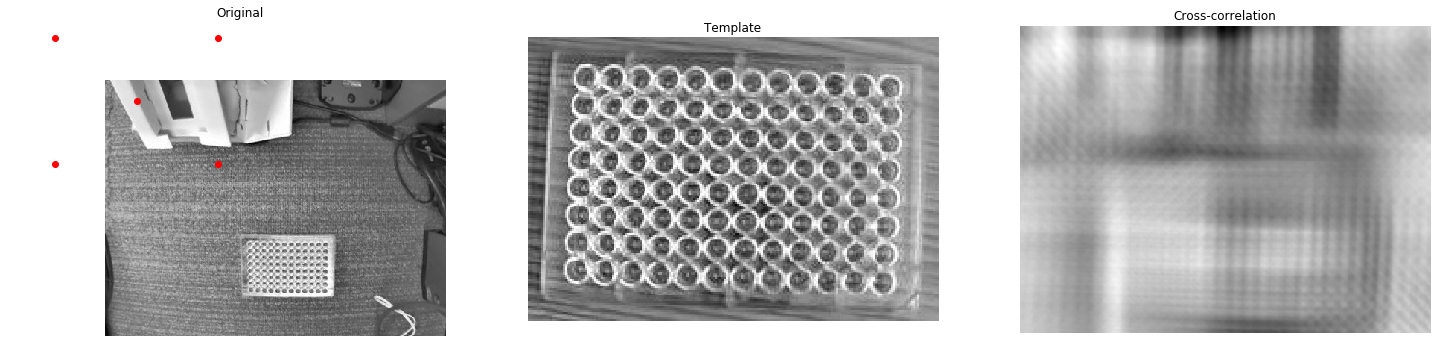

In [91]:
y, x = np.unravel_index(np.argmax(corr), corr.shape) # find the match
fig, (ax_orig, ax_template, ax_corr) = plt.subplots(1, 3, figsize=(25,25))
ax_orig.imshow(grayTestImg, cmap='gray')

_tlx = x-110
_tly = y-85

_trx = x+110
_try = y-85

_brx = x+110
_bry = y+85

_blx = x-110
_bly = y+85

ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_template.imshow(grayTemplate, cmap='gray')
ax_template.set_title('Template')
ax_template.set_axis_off()
ax_corr.imshow(corr, cmap='gray')
ax_corr.set_title('Cross-correlation')
ax_corr.set_axis_off()
ax_orig.plot(x, y, 'ro')

ax_orig.plot(_tlx, _tly, 'ro')
ax_orig.plot(_trx, _try, 'ro')
ax_orig.plot(_brx, _bry, 'ro')
ax_orig.plot(_blx, _bly, 'ro')
#fig.show()

244
124
464
294


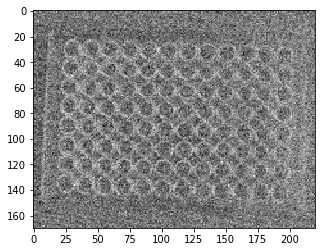

In [76]:
print(_tlx)
print(_tly)
print(_brx)
print(_bry)
foundPlateImg = np.copy(grayTestImg[_tly:_bry,_tlx:_brx])
plt.imshow(foundPlateImg, cmap = plt.get_cmap('gray'))
#plt.show()